<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EDA Imports
from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Final Capstone


In [2]:
# Reading each data file
# Reducing the file data size by 40% for memory
app_events = pd.read_csv("app_events.csv", nrows=19483840)
app_labels = pd.read_csv("app_labels.csv", nrows=275966)
events = pd.read_csv("events.csv", nrows=1951770)
gender_age_train = pd.read_csv("gender_age_train.csv", nrows=44787)
gender_age_test = pd.read_csv("gender_age_test.csv", nrows=67243)
category_labels = pd.read_csv("label_categories.csv", nrows=558)
phone_brand = pd.read_csv("phone_brand_device_model.csv", nrows=112347)


## Let's Take a look at the Datasets

In [3]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [4]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [5]:
app_labels.head()


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [6]:
category_labels.head()


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [7]:
phone_brand.head()


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


A lot of these phone brands contain chinese characters.  We will translate them as part of the merging.

# Exploratory Data Analysis

##Merging Datasets together

In [8]:
# Merging app_events and event_id through event_id column
merged_events = pd.merge(app_events, events, on="event_id")


In [9]:
# Merging app_labels and category_labels through label_id
merged_apps = pd.merge(app_labels, category_labels, on="label_id")


In [10]:
merged_events.shape

(19478586, 8)

In [11]:
merged_apps.shape

(60542, 3)

In [12]:
# Merging previous merged data tables together to make larger data frame
merged_events_apps = pd.merge(merged_events, merged_apps, on="app_id")


In [13]:
# Adding phone brand to merged_events_apps through device_id merge
merged_events_apps_brands = pd.merge(merged_events_apps, phone_brand, on="device_id")


In [14]:
# Creating final data frame by merging gender and age with previous dataframe
master_df = pd.merge(merged_events_apps_brands, gender_age_train, on="device_id")
master_df.tail()


,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,phone_brand,device_model,gender,age,group
4516274,1644253,34559227754570733,1,1,-5611908785796903499,2016-05-02 11:52:09,0.0,0.0,302,unknown,金立,F103S,M,26,M23-26
4516275,1644253,34559227754570733,1,1,-5611908785796903499,2016-05-02 11:52:09,0.0,0.0,306,unknown,金立,F103S,M,26,M23-26
4516276,1874484,34559227754570733,1,1,-5611908785796903499,2016-05-02 09:07:01,0.0,0.0,302,unknown,金立,F103S,M,26,M23-26
4516277,1874484,34559227754570733,1,1,-5611908785796903499,2016-05-02 09:07:01,0.0,0.0,306,unknown,金立,F103S,M,26,M23-26
4516278,1313077,-626198893166693462,1,1,8160655655365676139,2016-05-04 13:37:09,0.0,0.0,548,Industry tag,LG,P880,M,29,M29-31


In [15]:
master_df.shape

(4516279, 15)

# Translate Chinese Phone Brands into English

In [16]:
# Most of these were manually entered to get proper translation
to_english = {
    "华为": "huawei", 
    "小米": "xiaomi",  
    "魅族": "meizu", 
    "vivo": "vivo", 
    "酷派": "coolpad",  
    "索尼": "sony",  
    "OPPO": "oppo",  
    "LG": "lg",
    "HTC": "htc",  
    "金立": "gionee",  
    "中兴": "zte",  
    "奇酷": "qiku",  
    "TCL": "tcl", 
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
}


In [17]:
# Created new column for phone brand, can now drop old phone_brand column
master_df["english_phone_brand"] = master_df["phone_brand"].map(to_english)
master_df = master_df.drop(columns=["phone_brand"])


# Exploratory Charts

In [18]:
# Descriptive statistics.
master_df.describe()

,event_id,app_id,is_installed,is_active,device_id,longitude,latitude,label_id,age
count,4.516279e+06,4.516279e+06,4516279.0,4.516279e+06,4.516279e+06,4.516279e+06,4.516279e+06,4.516279e+06,4.516279e+06
mean,9.716941e+05,1.321011e+18,1.0,3.780373e-01,1.483745e+17,4.541422e+01,1.267923e+01,4.546896e+02,3.414907e+01
std,5.635599e+05,5.200231e+18,0.0,4.848971e-01,5.326803e+18,5.652630e+01,1.610578e+01,1.202579e+02,9.694198e+00
min,3.500000e+01,-9.216716e+18,1.0,0.000000e+00,-9.222957e+18,-1.800000e+02,-2.031000e+01,2.510000e+02,1.300000e+01
25%,4.845450e+05,-2.735762e+18,1.0,0.000000e+00,-4.467339e+18,0.000000e+00,0.000000e+00,3.030000e+02,2.700000e+01
50%,9.696500e+05,1.665047e+18,1.0,0.000000e+00,8.453126e+16,0.000000e+00,0.000000e+00,5.480000e+02,3.200000e+01
75%,1.461402e+06,5.927333e+18,1.0,1.000000e+00,4.881523e+18,1.143500e+02,3.058000e+01,5.490000e+02,4.000000e+01
max,1.951730e+06,9.222073e+18,1.0,1.000000e+00,9.220915e+18,1.343000e+02,5.232000e+01,5.680000e+02,8.800000e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad6d61ee10>,
      dtype=object)

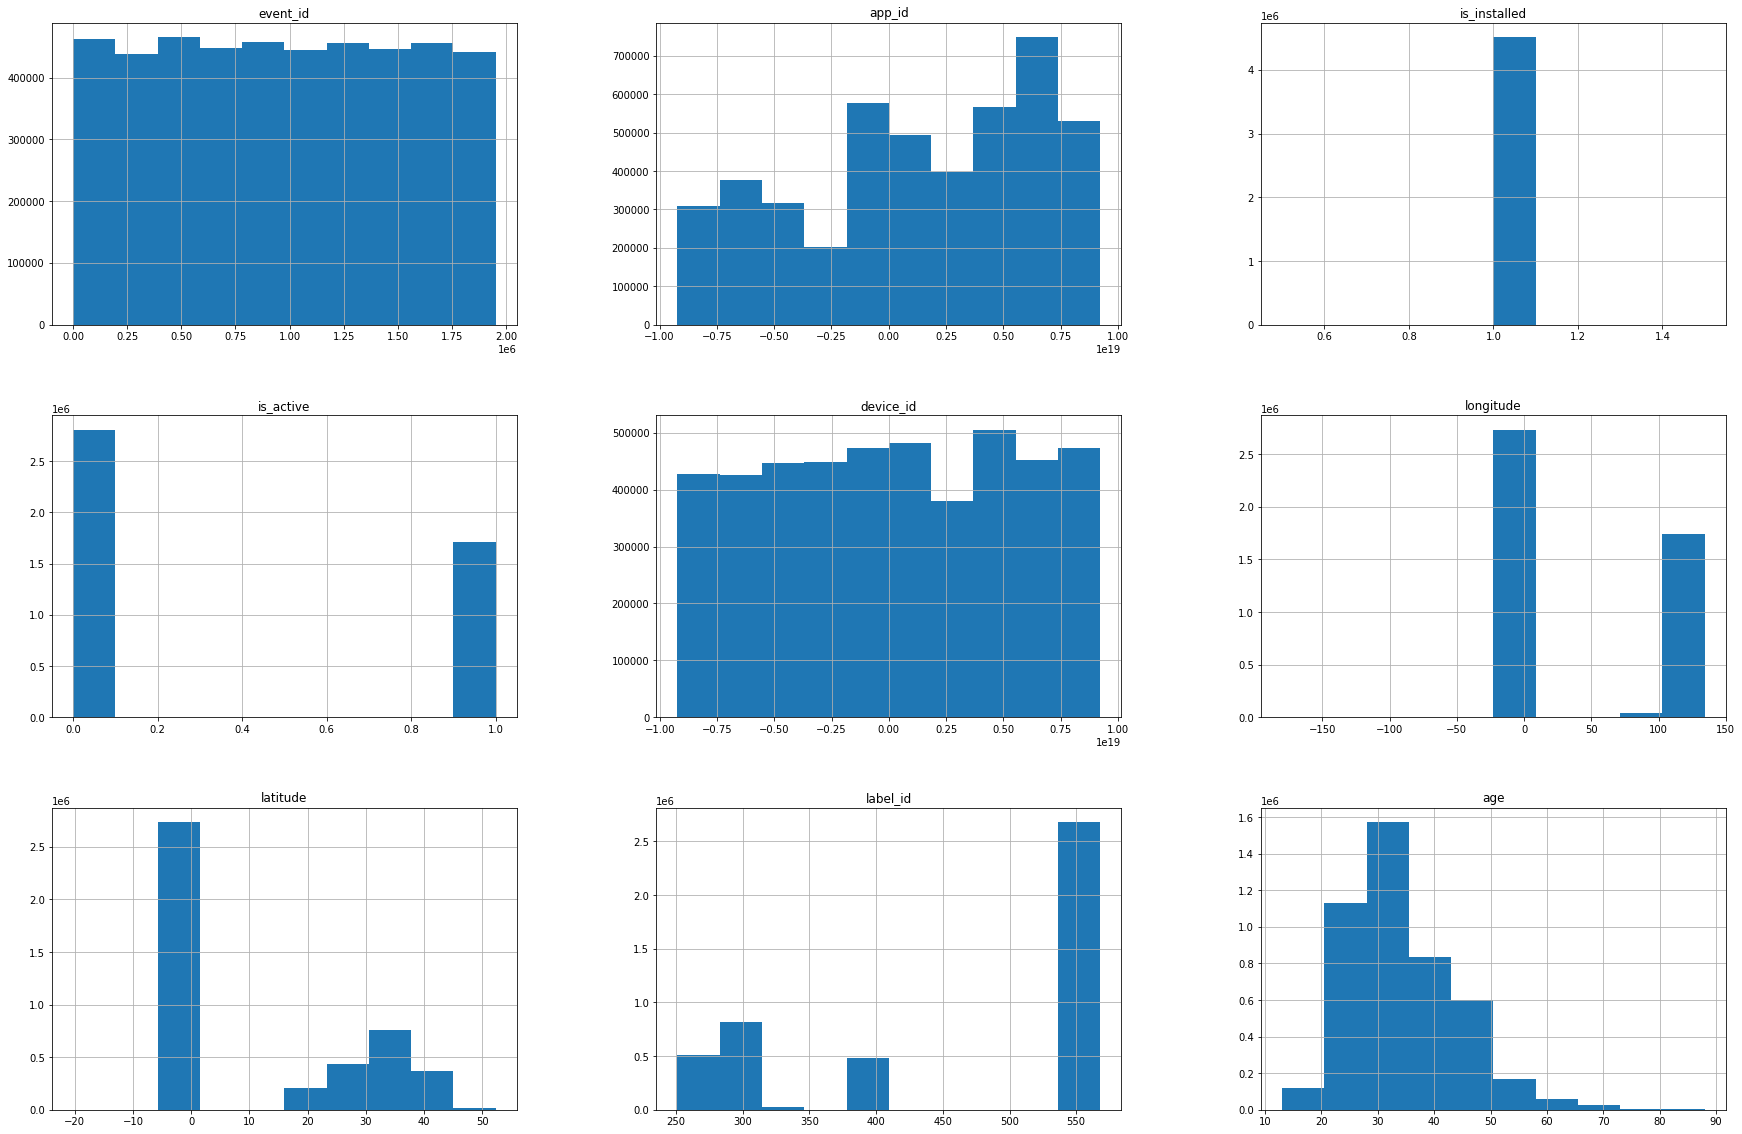

In [19]:
# Histogram
master_df.hist(figsize=(30,20))


Hmm, seems like none of these featuers are very normalized in form.  EventID, Age, and Device ID seem to be the only ones with some level of consistent.  

We will have to perform some cleaning to get them more alligned.  

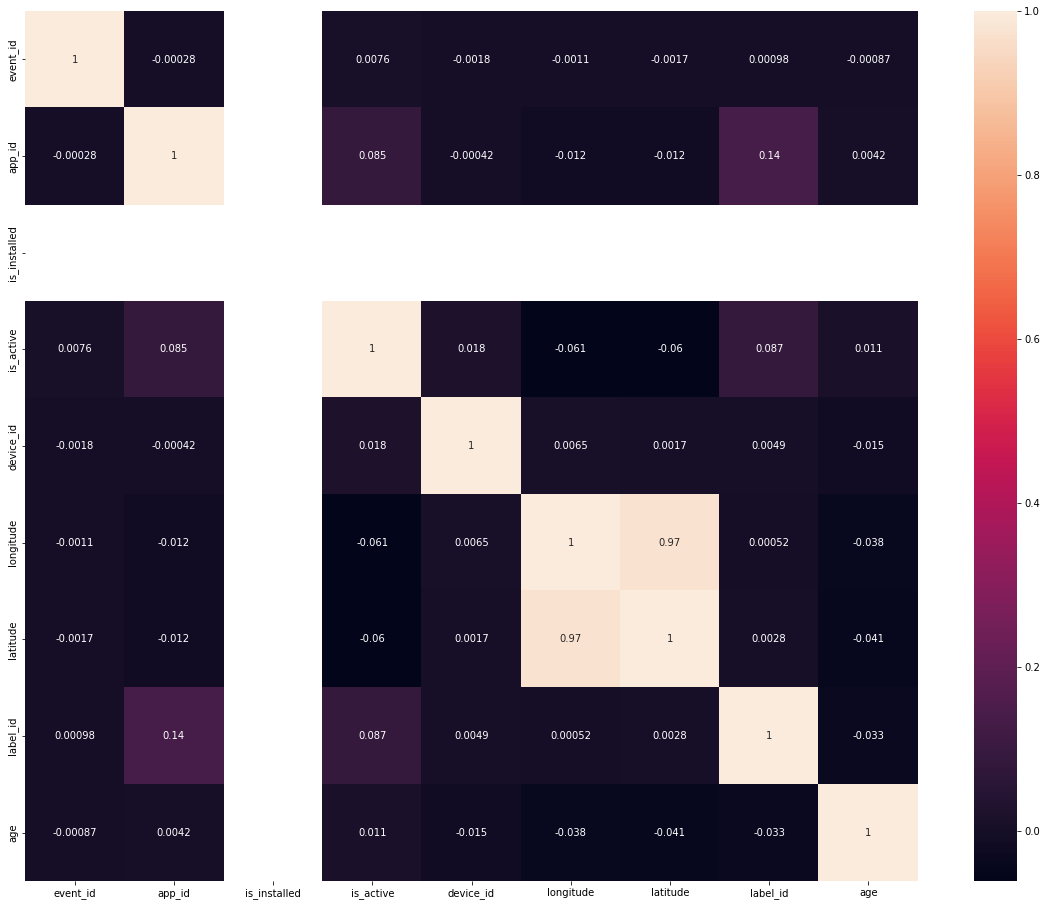


Correlation Table


,event_id,app_id,is_installed,is_active,device_id,longitude,latitude,label_id,age
event_id,1.000000,-0.000282,NaN,0.007581,-0.001846,-0.001075,-0.001710,0.000983,-0.000871
app_id,-0.000282,1.000000,NaN,0.085340,-0.000423,-0.011938,-0.012176,0.136246,0.004245
is_installed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_active,0.007581,0.085340,NaN,1.000000,0.018470,-0.061041,-0.059927,0.087450,0.011154
device_id,-0.001846,-0.000423,NaN,0.018470,1.000000,0.006518,0.001704,0.004925,-0.014762
longitude,-0.001075,-0.011938,NaN,-0.061041,0.006518,1.000000,0.971134,0.000523,-0.037694
latitude,-0.001710,-0.012176,NaN,-0.059927,0.001704,0.971134,1.000000,0.002789,-0.040531
label_id,0.000983,0.136246,NaN,0.087450,0.004925,0.000523,0.002789,1.000000,-0.032825
age,-0.000871,0.004245,NaN,0.011154,-0.014762,-0.037694,-0.040531,-0.032825,1.000000


In [20]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(20,16))
sns.heatmap(master_df.corr(),annot = True)
plt.show()

print()
print("Correlation Table")
# Correlation factors for 'delay time'.
master_df.corr()

Quite a lot of these do not correlate very well with each other.  Could be due to the overflow of data and the large amount of nulls and other facts.  We will have to drop some of these features and reduce our dataset a bit.  

# Let's finally take a look at the combined final DF

### Check for Nulls

- Checking for missing values
- For the english_phone_brand column it appears less than 1% of data is missing, so drop the missing data


In [21]:
master_df.isna().mean()


event_id               0.00000
app_id                 0.00000
is_installed           0.00000
is_active              0.00000
device_id              0.00000
timestamp              0.00000
longitude              0.00000
latitude               0.00000
label_id               0.00000
category               0.00000
device_model           0.00000
gender                 0.00000
age                    0.00000
group                  0.00000
english_phone_brand    0.00656
dtype: float64

- drop nulls


In [22]:
master_df = master_df.dropna()


In [23]:
# Check the shape
master_df.shape


(4486652, 15)

In [24]:
# Checking data types of each column
# timestamp is an object type,
# convert timestamp to datetime type
master_df.dtypes


event_id                 int64
app_id                   int64
is_installed             int64
is_active                int64
device_id                int64
timestamp               object
longitude              float64
latitude               float64
label_id                 int64
category                object
device_model            object
gender                  object
age                      int64
group                   object
english_phone_brand     object
dtype: object

In [25]:
master_df["timestamp"] = pd.to_datetime(master_df["timestamp"])


## Checking for Sufficient Amount of Values


In [26]:
#pd.set_option("display.max_rows", None)


- Only want to keep event_id with enough data,
- Drop event_id rows with < 100 values


In [27]:
master_df["event_id"].value_counts()


1358689    482
1691682    482
28574      482
1274697    482
1495937    482
          ... 
582140       1
212388       1
1056705      1
1782967      1
770378       1
Name: event_id, Length: 96857, dtype: int64

In [28]:
count = master_df["event_id"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["event_id"].isin(keep)]


- Only want to keep app_id values with enough data,
- Drop app_id rows with < 1000 values


In [29]:
master_df["app_id"].value_counts()


 628020936226491308     40760
 33792862810792679      38640
 4348659952760821294    34863
 7316250158002095415    34446
 4244331088397413857    29248
                        ...  
-6530064539810173493        1
-6248776539568402231        1
 3077763483809706787        1
-3640924485131277903        1
-7628231288117243753        1
Name: app_id, Length: 3128, dtype: int64

In [30]:
count = master_df["app_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["app_id"].isin(keep)]


- Appears to be enough information for each value
- Will leave this column alone.


In [31]:
master_df["is_active"].value_counts()


0    1233026
1     211574
Name: is_active, dtype: int64

- Only want to keep device_id values with enough data,
- Drop device_id rows with < 1000 values


In [32]:
master_df["device_id"].value_counts()


-4814793614000680392    46493
-806096877239654999     35793
-669426881946113309     23605
 5266220763241423819    22784
 4810860241711208118    19245
                        ...  
 367173766040888135        32
 5094521126196895843       32
-2245813893089105816       31
-3001338772070455674       30
 4648493134635137430       21
Name: device_id, Length: 1464, dtype: int64

In [33]:
count = master_df["device_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_id"].isin(keep)]


- Only want to keep timestamp values with enough data,
- Drop timestamp rows with < 100 values


In [34]:
master_df["timestamp"].value_counts()


2016-05-02 14:20:11    436
2016-05-02 10:52:19    414
2016-05-02 12:55:20    413
2016-05-01 11:03:30    406
2016-05-01 21:27:12    391
                      ... 
2016-05-01 09:32:01     69
2016-05-06 08:29:32     69
2016-05-01 18:07:22     69
2016-05-07 03:57:16     36
2016-05-01 18:54:05     35
Name: timestamp, Length: 8206, dtype: int64

In [35]:
count = master_df["timestamp"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["timestamp"].isin(keep)]


- Only want to keep longitude values with enough data,
- Drop longitude rows with < 10000 values


In [36]:
master_df["longitude"].value_counts()


0.00      429999
116.63     20223
116.65     19242
119.45     16652
119.50     15588
           ...  
114.34       100
103.93        97
114.33        93
103.39        90
123.47        83
Name: longitude, Length: 435, dtype: int64

In [37]:
count = master_df["longitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["longitude"].isin(keep)]


- Only want to keep latitude values with enough data,
- Drop latitude rows with < 10000 values


In [38]:
master_df["latitude"].value_counts()


0.00     429999
40.10     19430
31.37     15694
31.36     15588
40.12     15147
34.24     14511
39.82     10504
40.13      2766
40.11      1049
31.38       958
40.09       692
34.70       398
34.22       353
34.23       118
39.90       111
39.91       107
Name: latitude, dtype: int64

In [39]:
count = master_df["latitude"].value_counts()
keep = count[count >= 10000].index
master_df = master_df[master_df["latitude"].isin(keep)]


- Only want to keep label_id values with enough data,
- Drop label_id rows with < 1000 values


In [40]:
master_df["label_id"].value_counts()


548    135084
549     99088
405     51351
302     41703
251     30249
303     28243
252     16648
306     15403
564     15377
254     11482
562     10907
407     10641
406     10641
263      8547
253      7530
262      6137
256      5019
551      3278
566      2631
558      2539
565      1950
326      1303
318       973
261       842
255       740
559       739
555       739
552       739
568       278
259        72
Name: label_id, dtype: int64

In [41]:
count = master_df["label_id"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["label_id"].isin(keep)]


- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [42]:
master_df["category"].value_counts()


Industry tag                 135084
Property Industry 1.0         99088
unknown                       95990
Custom label                  51351
Finance                       30249
Wealth Management             16648
pursue                        15377
Direct Bank                   11482
Science and Technology        10907
DS_P2P net loan               10641
Debit and credit               8547
IMF                            7530
Pay                            6137
Securities                     5019
Customization                  3278
Personal Effectiveness         2631
service                        2539
Smart Shopping                 1950
Condition of the vehicles      1303
Name: category, dtype: int64

- Only want to keep device_model values with enough data,
- Drop device_model rows with < 1000 values


In [43]:
master_df["device_model"].value_counts()


荣耀3X               34924
Ascend G7          31493
Mate 7             29952
荣耀6 Plus           29426
荣耀6                26605
                   ...  
S5.1Pro               96
Galaxy Core Max       88
9190l                 86
R1C                   71
One E8                71
Name: device_model, Length: 105, dtype: int64

In [44]:
count = master_df["device_model"].value_counts()
keep = count[count >= 1000].index
master_df = master_df[master_df["device_model"].isin(keep)]


- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [45]:
master_df["gender"].value_counts()


M    409565
F     93542
Name: gender, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [46]:
master_df["age"].value_counts()


26    41395
24    40185
42    31850
28    31653
32    27596
36    22843
30    21578
38    21169
29    18111
39    15666
41    15204
34    14905
27    14386
48    12625
31    12181
33    11349
35    11303
44    10494
49    10065
40    10038
43     9862
22     9355
23     9055
45     8452
20     7808
56     7764
25     6931
21     6702
47     6509
37     6498
46     6338
50     5764
52     3123
19     2845
54     2406
61     2146
68     1363
53     1268
67     1251
57     1158
70     1089
88      737
64       87
Name: age, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [47]:
master_df["group"].value_counts()


M39+      111331
M32-38    104804
M23-26     91564
M29-31     43598
F33-42     38566
M27-28     36260
F43+       23902
M22-       22008
F29-32     10591
F27-28      9779
F24-26      5812
F23-        4892
Name: group, dtype: int64

- There seems to be sufficient data for each of the values,
- Will leave this column alone


In [48]:
master_df["english_phone_brand"].value_counts()


huawei     244704
xiaomi      79717
samsung     50559
meizu       45842
coolpad     18045
oppo        16736
lshi         8070
lenovo       5783
nubia        4886
vivo         4404
hammer       4242
oneplus      4194
asus         3200
htc          3170
aiyouni      3164
qiku         2526
lg           2190
zte          1675
Name: english_phone_brand, dtype: int64

# Removing Unnecessary Columns 

In [49]:
master_df.head()


,event_id,app_id,is_installed,is_active,device_id,timestamp,longitude,latitude,label_id,category,device_model,gender,age,group,english_phone_brand
3211,198,5927333115845830913,1,0,6984152891252102027,2016-05-02 00:17:01,0.0,0.0,549,Property Industry 1.0,MI 4,M,36,M32-38,xiaomi
3212,198,5927333115845830913,1,0,6984152891252102027,2016-05-02 00:17:01,0.0,0.0,548,Industry tag,MI 4,M,36,M32-38,xiaomi
3213,59288,5927333115845830913,1,1,6984152891252102027,2016-05-04 21:19:31,0.0,0.0,549,Property Industry 1.0,MI 4,M,36,M32-38,xiaomi
3214,59288,5927333115845830913,1,1,6984152891252102027,2016-05-04 21:19:31,0.0,0.0,548,Industry tag,MI 4,M,36,M32-38,xiaomi
3215,214667,5927333115845830913,1,1,6984152891252102027,2016-05-01 01:19:10,0.0,0.0,549,Property Industry 1.0,MI 4,M,36,M32-38,xiaomi


- Since is_installed only have one unique value this column will be dropped.
- Getting rid of category column and using label_id to identify category


In [50]:
master_df = master_df.drop(
    columns=["is_installed", "timestamp", "latitude", "longitude", "category"]
)
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand
3211,198,5927333115845830913,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi
3212,198,5927333115845830913,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi
3213,59288,5927333115845830913,1,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi
3214,59288,5927333115845830913,1,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi
3215,214667,5927333115845830913,1,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi


- Gets rid of duplicate rows and adds count as size




In [51]:
master_df = master_df.groupby(master_df.columns.tolist(), as_index=False).size()
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1


- Creating unique column for device and app ids


In [52]:
master_df["download_id"] = master_df["app_id"] + master_df["device_id"]


In [53]:
master_df.head()


,event_id,app_id,is_active,device_id,label_id,device_model,gender,age,group,english_phone_brand,size,download_id
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500


- Creating new dataframe grouping download ids to create list of label ids


In [54]:
label_ids = (
    master_df.groupby(["download_id"])
    .agg(lambda x: tuple(x))
    .applymap(list)
    .reset_index()[["label_id", "download_id"]]
)
label_ids.head()


,label_id,download_id
0,"[302, 303, 548, 549, 302, 303, 548, 549, 302, ...",-9221783136362726203
1,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ...",-9220737745617207094
2,"[251, 252, 405, 548, 549]",-9219175122489247902
3,"[548, 548, 548, 548, 548, 548, 548, 548, 548, ...",-9218860957967398438
4,"[251, 252, 262, 405, 548, 549, 251, 252, 262, ...",-9218492630374017435


In [55]:
len(label_ids)


15123

- Adding the download_id column to original dataframe


In [56]:
master_df = master_df.merge(label_ids, how="left", on="download_id")


In [57]:
master_df.head()


,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
0,198,-8807740666788515175,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
1,198,-8807740666788515175,0,6984152891252102027,549,MI 4,M,36,M32-38,xiaomi,1,-1823587775536413148,"[548, 549, 548, 549, 548, 549, 548, 549, 548, ..."
2,198,-7415261454408512527,0,6984152891252102027,254,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
3,198,-7415261454408512527,0,6984152891252102027,548,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."
4,198,-7415261454408512527,0,6984152891252102027,562,MI 4,M,36,M32-38,xiaomi,1,-431108563156410500,"[254, 548, 562, 564, 254, 548, 562, 564, 254, ..."


In [58]:
master_df.shape


(502101, 13)

- Dropping duplicate rows


In [59]:
master_df = master_df.drop_duplicates(["download_id"], keep="first")


- Need to reduce to around 2 million rows


In [60]:
master_df.shape


(15123, 13)

In [61]:
master_df.isna().mean()


event_id               0.0
app_id                 0.0
is_active              0.0
device_id              0.0
label_id_x             0.0
device_model           0.0
gender                 0.0
age                    0.0
group                  0.0
english_phone_brand    0.0
size                   0.0
download_id            0.0
label_id_y             0.0
dtype: float64

In [62]:
master_df.tail(15)


,event_id,app_id,is_active,device_id,label_id_x,device_model,gender,age,group,english_phone_brand,size,download_id,label_id_y
480818,1866283,-8022267440849930066,0,-1196907681639317836,251,Galaxy Note 3,M,29,M29-31,samsung,1,-9219175122489247902,"[251, 252, 405, 548, 549]"
480842,1866283,-1633887856876571208,0,-1196907681639317836,251,Galaxy Note 3,M,29,M29-31,samsung,1,-2830795538515889044,"[251, 263, 302, 306, 405]"
480865,1866283,487766649788038994,0,-1196907681639317836,405,Galaxy Note 3,M,29,M29-31,samsung,1,-709141031851278842,"[405, 548, 549]"
484801,1878102,-7685129465082408908,1,-1548669842713562951,548,P8 Lite,F,53,F43+,huawei,1,9212944765913579757,"[548, 549]"
484870,1878102,2784255869128134945,0,-1548669842713562951,548,P8 Lite,F,53,F43+,huawei,1,1235586026414571994,"[548, 549]"
484899,1878102,5070413844955847732,0,-1548669842713562951,405,P8 Lite,F,53,F43+,huawei,1,3521744002242284781,"[405, 548, 549]"
484923,1878102,7167114343576723123,0,-1548669842713562951,251,P8 Lite,F,53,F43+,huawei,1,5618444500863160172,"[251, 263, 405, 548, 549]"
491038,1901035,-3537151735276037866,0,-6926347091752945591,251,红米note,M,28,M27-28,xiaomi,1,7983245246680568159,"[251, 263, 302, 303, 405, 548, 549]"
491045,1901035,-1633933922436094199,0,-6926347091752945591,548,红米note,M,28,M27-28,xiaomi,1,-8560281014189039790,"[548, 549]"
496946,1924878,-3537151735276037866,0,-3818654833559084603,251,note顶配版,M,26,M23-26,xiaomi,1,-7355806568835122469,"[251, 263, 302, 303, 405, 548, 549]"


- Only used the download_id column to create multiple labels in one column, so no longer need that column
- Also do not need the label_id_x column since label_id_y contains all the labels


In [63]:
 master_df = master_df.drop(columns=["label_id_x", "download_id"])
master_df.tail()


,event_id,app_id,is_active,device_id,device_model,gender,age,group,english_phone_brand,size,label_id_y
496962,1924878,-1795740157468032841,0,-3818654833559084603,note顶配版,M,26,M23-26,xiaomi,1,"[302, 306, 548]"
496971,1924878,-653184324994839917,0,-3818654833559084603,note顶配版,M,26,M23-26,xiaomi,1,"[548, 551, 558, 564, 566]"
496999,1924878,3879845647105392250,0,-3818654833559084603,note顶配版,M,26,M23-26,xiaomi,1,"[548, 549]"
497032,1924878,7370144952606940864,0,-3818654833559084603,note顶配版,M,26,M23-26,xiaomi,1,"[251, 252, 253, 254, 262]"
498991,1935168,5927333115845830913,1,6201851326375590778,荣耀6 Plus,F,67,F43+,huawei,1,"[548, 549]"


In [64]:
master_df.shape


(15123, 11)

# Checking value counts for new data frames

In [65]:
pd.set_option("display.max_rows", None)


In [66]:
master_df["event_id"].value_counts()


279442     104
58069       94
36033       89
101424      87
28574       86
156393      86
58455       83
15755       81
195088      77
49051       75
542394      73
166584      71
82012       69
515461      68
72662       68
361045      67
115861      67
34197       67
381686      67
127065      66
201017      66
736602      65
760733      65
330367      64
419454      64
2477        63
10333       63
5371        63
40338       63
466506      62
77677       62
1011672     62
178635      61
367525      61
80925       61
66606       60
120844      60
489352      60
38995       59
925         59
33967       59
596570      58
6039        58
2645        58
405967      58
74189       58
8429        58
160443      58
15991       58
250583      58
3052        58
446062      58
172831      58
343805      57
8483        57
122593      57
64806       57
23529       57
315879      57
580964      57
176892      56
131701      56
264064      56
66329       56
214565      55
1220980     55
246303    

- Only keep data that contains at least 10 counts,


In [67]:
count = master_df["event_id"].value_counts()
keep = count[count >= 10].index
master_df = master_df[master_df["event_id"].isin(keep)]


In [68]:
master_df["device_model"].value_counts()


荣耀6 Plus           1246
Mate 7             1126
荣耀6                1070
MI 4                811
Galaxy Note 3       540
小米note              523
MX5                 432
红米Note2             427
小米4C                412
Galaxy S5           349
R7 Plus             311
F2                  310
note顶配版             278
魅蓝NOTE              265
MI 3                244
荣耀7                 243
荣耀畅玩4C              227
P8 Lite             208
红米note              200
超级手机1               195
红米2                 187
大神Note3             181
Galaxy S6           177
红米Note3             172
荣耀X2                163
荣耀畅玩5X              155
魅蓝metal             153
ZenFone 2           151
Galaxy Note 4       150
MX4                 149
超级手机1 Pro           134
MX4 Pro             129
青春版                 126
超级手机1s              115
P8max               113
X5SL                111
红米2A                104
U3                  104
坚果手机                103
荣耀7i                102
荣耀3C                100
PRO5            

- Only keep data that contains at least 100 counts,


In [69]:
count = master_df["device_model"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["device_model"].isin(keep)]


In [70]:
master_df["english_phone_brand"].value_counts()


huawei     4753
xiaomi     3358
samsung    1216
meizu      1128
coolpad     491
lshi        444
oppo        311
asus        151
qiku        126
vivo        111
aiyouni     104
hammer      103
Name: english_phone_brand, dtype: int64

- Only keep data that contains at least 100 counts,


In [71]:
count = master_df["english_phone_brand"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["english_phone_brand"].isin(keep)]


In [72]:
master_df["size"].value_counts()


1    12231
2       65
Name: size, dtype: int64

- Only keep data that contains at least 100 counts,


In [73]:
count = master_df["size"].value_counts()
keep = count[count >= 100].index
master_df = master_df[master_df["size"].isin(keep)]


In [74]:
master_df.shape


(12231, 11)

In [75]:
master_df["device_id"].value_counts()


 3501470306085506711    104
 6235671252343430682     94
 6743854432188980361     89
 3712119186429288439     87
-7410679970237215532     86
-2887114434325774500     86
-8676244203426339853     83
-2611733232907371667     81
-8552278802939132943     77
-9122745692722607839     75
 1052872047402580097     71
 5907292383047496113     71
 1315525989930564136     69
 626071240346317401      68
 5796372344121324287     68
 6201851326375590778     67
-2491252495876406599     67
-3911293973344461010     67
-7259112553687932088     67
 9164960547178665493     67
 5587837929619725000     66
 7353572136329657630     66
 8781655188184243016     65
-3541649923863661263     65
-7839621909216476700     64
-7804296101691453441     64
-1227933520082640976     63
-6887525481849727578     63
-4660967967664722680     63
-2010019061312728589     63
 830421149800211303      62
 873939917477332316      62
 3101106144238649232     61
-8896704548422631755     61
-4551768034596689389     61
-906684455621397904 

After doing some data cleaning, the dataframe went from 4,486,652 rows by 15 columns to 12231 rows by 11 columns.





# Preparing Data For Analysis

### One Hot Encoding


- Encoding the label_id_y column


In [76]:
mlb = MultiLabelBinarizer()
master_df = master_df.join(
    pd.DataFrame(
        mlb.fit_transform(master_df.pop("label_id_y")),
        columns=mlb.classes_,
        index=master_df.index,
    )
)


In [77]:
master_df = pd.get_dummies(
    master_df, columns=["english_phone_brand", "device_model"], drop_first=True
)
master_df.head()


,event_id,app_id,is_active,device_id,gender,age,group,size,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,...,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal
0,198,-8807740666788515175,0,6984152891252102027,M,36,M32-38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,198,-7415261454408512527,0,6984152891252102027,M,36,M32-38,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,198,-6538188762242952077,1,6984152891252102027,M,36,M32-38,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,198,-6493194103110420302,0,6984152891252102027,M,36,M32-38,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,198,-6349602347932703147,0,6984152891252102027,M,36,M32-38,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Dropping Unnecessary Columns


- Since I will be using group as the target variable, and group contains both age and gender, I can drop gender/age column
- Size of Duplicate rows does not seem like it is too important mainly because there were not many duplicate rows, drop size


In [78]:
master_df = master_df.drop(columns=["gender", "age", "size"])
master_df.head()


,event_id,app_id,is_active,device_id,group,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal
0,198,-8807740666788515175,0,6984152891252102027,M32-38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,198,-7415261454408512527,0,6984152891252102027,M32-38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,198,-6538188762242952077,1,6984152891252102027,M32-38,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,198,-6493194103110420302,0,6984152891252102027,M32-38,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,198,-6349602347932703147,0,6984152891252102027,M32-38,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
master_df.shape


(12231, 78)

- Converting object data to numeric data in group column


In [80]:
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
master_df["num_group"] = master_df["group"].map(to_num)
master_df = master_df.drop(columns=["group"])
master_df.head()


,event_id,app_id,is_active,device_id,251,252,253,254,256,262,263,302,303,306,326,405,406,407,548,549,551,558,562,564,565,566,english_phone_brand_asus,english_phone_brand_coolpad,english_phone_brand_hammer,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_qiku,english_phone_brand_samsung,english_phone_brand_vivo,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_Galaxy Note 4,device_model_Galaxy S5,device_model_Galaxy S6,device_model_MI 3,device_model_MI 4,device_model_MX4,device_model_MX4 Pro,device_model_MX5,device_model_Mate 7,device_model_P8 Lite,device_model_P8max,device_model_R7 Plus,device_model_U3,device_model_X5SL,device_model_ZenFone 2,device_model_note顶配版,device_model_坚果手机,device_model_大神Note3,device_model_小米4C,device_model_小米note,device_model_红米2,device_model_红米2A,device_model_红米Note2,device_model_红米Note3,device_model_红米note,device_model_荣耀3C,device_model_荣耀6,device_model_荣耀6 Plus,device_model_荣耀7,device_model_荣耀7i,device_model_荣耀X2,device_model_荣耀畅玩4C,device_model_荣耀畅玩5X,device_model_超级手机1,device_model_超级手机1 Pro,device_model_超级手机1s,device_model_青春版,device_model_魅蓝NOTE,device_model_魅蓝metal,num_group
0,198,-8807740666788515175,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,198,-7415261454408512527,0,6984152891252102027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,198,-6538188762242952077,1,6984152891252102027,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
10,198,-6493194103110420302,0,6984152891252102027,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
15,198,-6349602347932703147,0,6984152891252102027,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


# Create Visualization


- Need to change font size of x and y axis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


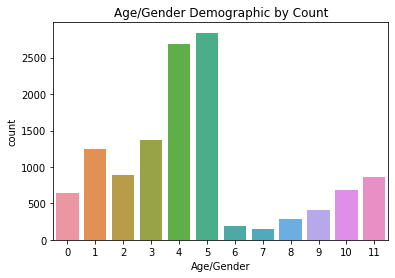

In [81]:
sns.countplot(master_df["num_group"])
plt.title("Age/Gender Demographic by Count")
plt.ylabel("count")
plt.xlabel("Age/Gender")
plt.show()


- It seems like most of the data is for non-active apps, however 1/5 of the data is still good for  active apps.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


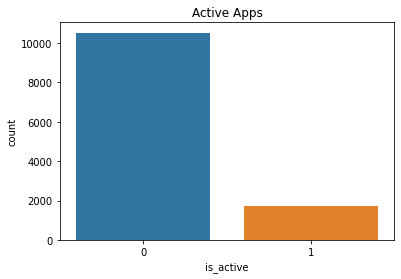

In [82]:
sns.countplot(master_df["is_active"])
plt.title("Active Apps")
plt.show()


Saving Cleaned Data as a New CSV


In [83]:
# When finished with cleaning, save it as a csv to use for future notebooks and save time
master_df.to_csv("master_clean.csv", index=False)


In [84]:
# Check to see if cleaned csv is in working directory
!dir


app_events.csv
app_labels.csv
Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv
Deep\ Learning.ipynb
events.csv
Exploratory\ Data\ Analysis.ipynb
gender_age_test.csv
gender_age_train.csv
label_categories.csv
master_clean.csv
phone_brand_device_model.csv
Project\ Proposal\ &\ Information.ipynb
sample_submission.csv
Supervised\ Learning.ipynb
test\ merge.ipynb
Unsupervised\ Learning.ipynb
